In [31]:
# Importando libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('pokemon_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Nível     1000 non-null   int64
 1   Vitórias  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [7]:
df.describe()

,Nível,Vitórias
count,1000.000000,1000.000000
mean,50.128000,50.987000
std,29.573505,30.606594
min,1.000000,0.000000
25%,24.000000,25.000000
50%,51.000000,52.000000
75%,75.000000,76.000000
max,100.000000,121.000000


In [8]:
df.corr()

,Nível,Vitórias
Nível,1.000000,0.954055
Vitórias,0.954055,1.000000


<Axes: xlabel='Vitórias', ylabel='Count'>

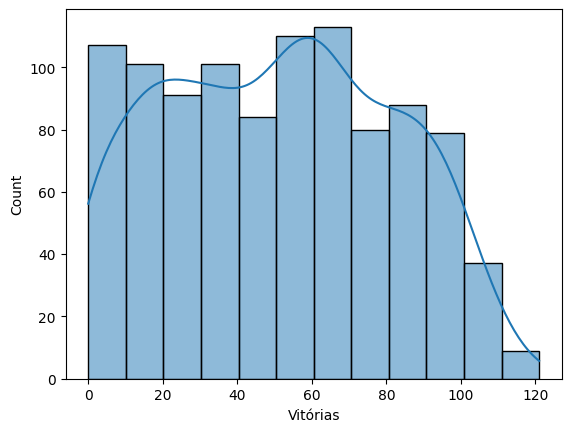

In [10]:
sns.histplot(data = df, x = 'Vitórias', kde = True)
# talvez precise normalizar

In [11]:
# Preparação variável de entrada X
X = np.array(df['Vitórias']).reshape(-1, 1)

In [12]:
# Preparação variável de saída y (variável alvo)
y = np.array(df['Nível'])

<function matplotlib.pyplot.show(close=None, block=None)>

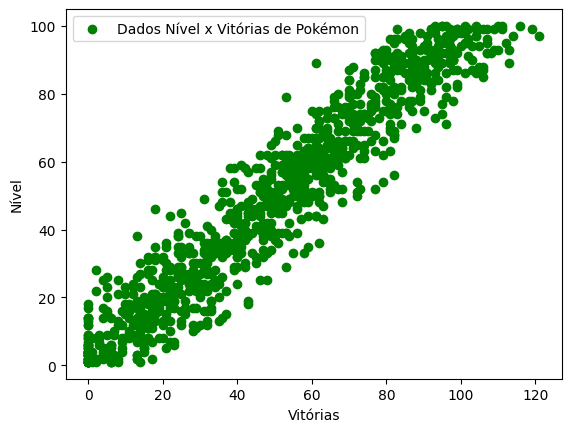

In [20]:
# Visualizando gráfico de dispersão entre X e y
plt.scatter(X, y, color = "green", label = "Dados Nível x Vitórias de Pokémon")
plt.xlabel("Vitórias")
plt.ylabel("Nível")
plt.legend()
plt.show

In [14]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
# Intanciando o modelo de Regressão Linear e treinando o mesmo
model = LinearRegression().fit(X_train, y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

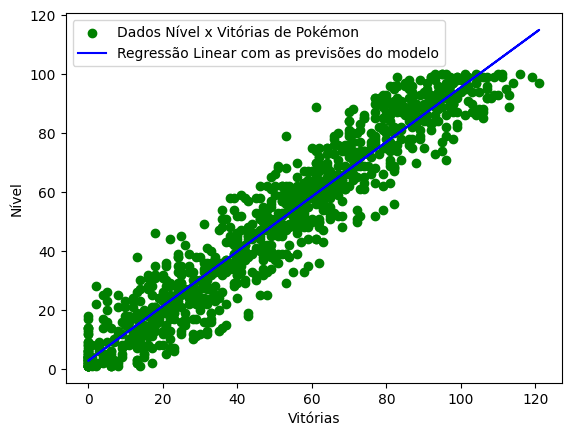

In [21]:
# Visualizando gráfico de dispersão entre X e y
plt.scatter(X, y, color = "green", label = "Dados Nível x Vitórias de Pokémon")
plt.plot(X, model.predict(X), color = "blue", label = "Regressão Linear com as previsões do modelo")
plt.xlabel("Vitórias")
plt.ylabel("Nível")
plt.legend()
plt.show

In [19]:
# Avaliar o modelo nos dados de teste
score = model.score(X_test, y_test)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.91


In [22]:
# Onde a linha passa pelo eixo Y
model.intercept_

np.float64(2.7475402335896177)

In [23]:
# Inclinação da reta
model.coef_

array([0.92770098])

## Deploy do modelo
Usaremos o modelo para prever o nível do pokémon com base o número de vitórias que o mesmo possui.

In [49]:
# Definimos um novo valor de X para fazer a previsão
X_novo = np.array([[54]])

# Calculamos a previsão usando o modelo treinado
nivel_previsao = model.predict(X_novo)

# Imprimimos a previsão, com o detalhe que no máximo o nível possível que um pokémon atinja no jogo é 100
print(f"Se o pokémon tiver {X_novo[0][0]} vitórias é previsto que ele esteja no nível {min(round(nivel_previsao[0]), 100)}")

Se o pokémon tiver 54 vitórias é previsto que ele esteja no nível 53


In [52]:
# validando o resultado anterior, mas usando os coeficientes da reta aprendidos pelo modelo
# y_novo = b0 + b1 * X_novo
nivel_previsao = model.intercept_ + model.coef_ * X_novo
print(min(round(nivel_previsao[0][0]), 100))

53
